<a href="https://colab.research.google.com/github/Eddythemachine/linear_regression_learning/blob/main/regresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBS

In [3]:
# IMPORTING LIBS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# IMPORTING DATAES

In [5]:
df = pd.read_csv('car_sale.csv')
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
df.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


## Checking for null values

In [8]:
df.isnull().sum()

,0
Brand,0
Price,172
Body,0
Mileage,0
EngineV,150
Engine Type,0
Registration,0
Year,0
Model,0


In [9]:
df.shape

(4345, 9)

## Filling Empty Values with the Average of Values

In [10]:
# prompt: using sklearn, feel price with average values

# Fill missing values in 'Price' column with the mean
df['Price'] = df['Price'].fillna(df['Price'].mean())

# Assuming 'df' is your DataFrame and 'CategoricalColumn' is the column with missing values
df['EngineV'].fillna(df['EngineV'].mode()[0], inplace=True)

df.isnull().sum()


<ipython-input-10-d0cbb1f04526>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EngineV'].fillna(df['EngineV'].mode()[0], inplace=True)


,0
Brand,0
Price,0
Body,0
Mileage,0
EngineV,0
Engine Type,0
Registration,0
Year,0
Model,0


# Data Visualistion

In [11]:
df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Creating Correlation of data

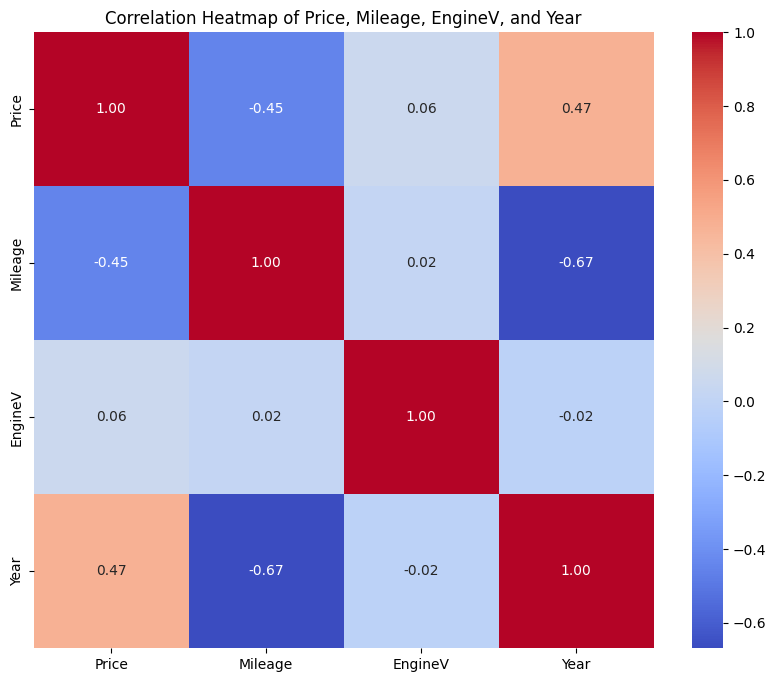

In [12]:
# Select the relevant columns for the heatmap
df_heatmap = df[['Price', 'Mileage', 'EngineV', 'Year']]

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Price, Mileage, EngineV, and Year')
plt.show()


## Key Correlations in Car Sales Data

This analysis highlights two key correlations in the car sales dataset:

**1. Mileage and Price: A Negative Correlation**

The analysis reveals a negative correlation between mileage and price, with a correlation coefficient of -0.67. This implies that as the mileage of a car increases (indicating more usage), its price tends to decrease. This relationship is logical, as cars with higher mileage are often perceived to have experienced greater wear and tear, potentially impacting their value and leading to lower prices compared to cars with lower mileage.

**2. Price and Year: A Positive Correlation**

The analysis also reveals a positive correlation between price and year, with a correlation coefficient of 0.47. This implies that as the year of a car increases (indicating a newer model), its price tends to increase as well. Newer cars often command higher prices due to factors such as updated features, technology, and perceived better condition.

**Correlation Strengths:**

* Mileage and Price: The correlation coefficient of -0.67 suggests a moderately strong negative correlation. This indicates a noticeable tendency for cars with higher mileage to have lower prices.
* Price and Year: The correlation coefficient of 0.47 suggests a moderately strong positive correlation. This indicates a noticeable tendency for newer cars to have higher prices.

**Practical Significance:**

These correlations have practical implications for both buyers and sellers in the used car market:

* **Sellers:** Mileage and year of manufacture are crucial factors in determining the asking price of a used car. Higher mileage often leads to lower asking prices, while newer cars generally command higher prices.
* **Buyers:** Buyers consider mileage and year of manufacture as indicators of a car's condition, features, and technology. They often negotiate prices based on these factors, seeking a balance between price and desired attributes.

**Important Considerations:**

* **Correlation vs. Causation:** While these correlations are significant, it's important to remember that correlation does not imply causation. Other factors, such as car condition, brand, model, and market demand, can also influence price.
* **Overall Analysis:** These correlations provide valuable insights into the relationship between key variables in the car sales dataset. However, it's crucial to consider all relevant factors and conduct a comprehensive analysis to make informed decisions in the used car market.

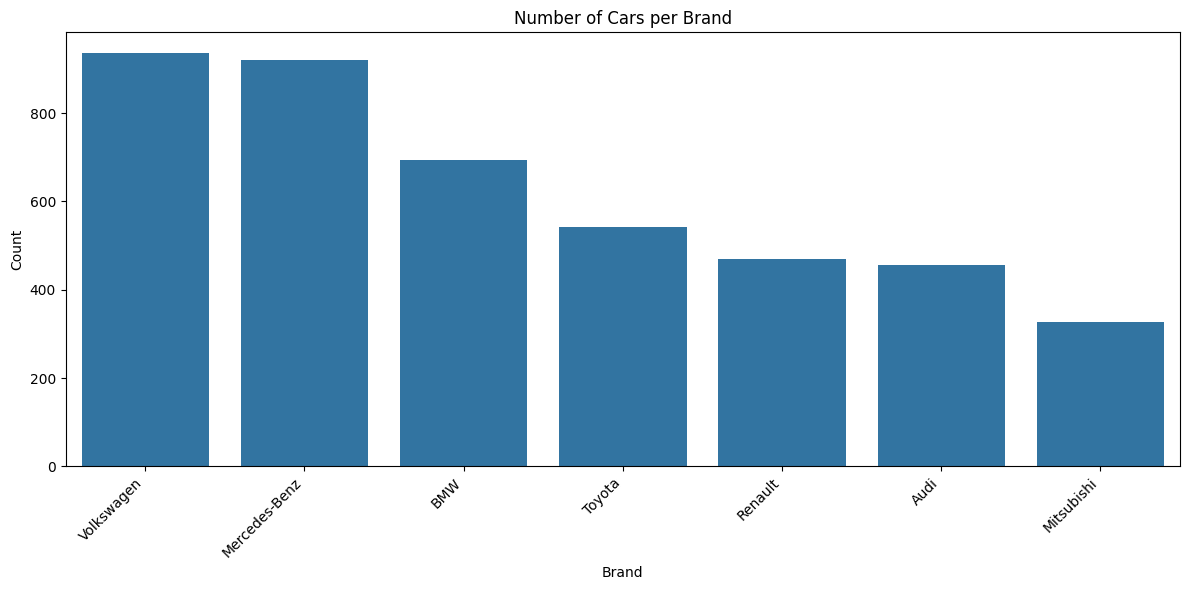

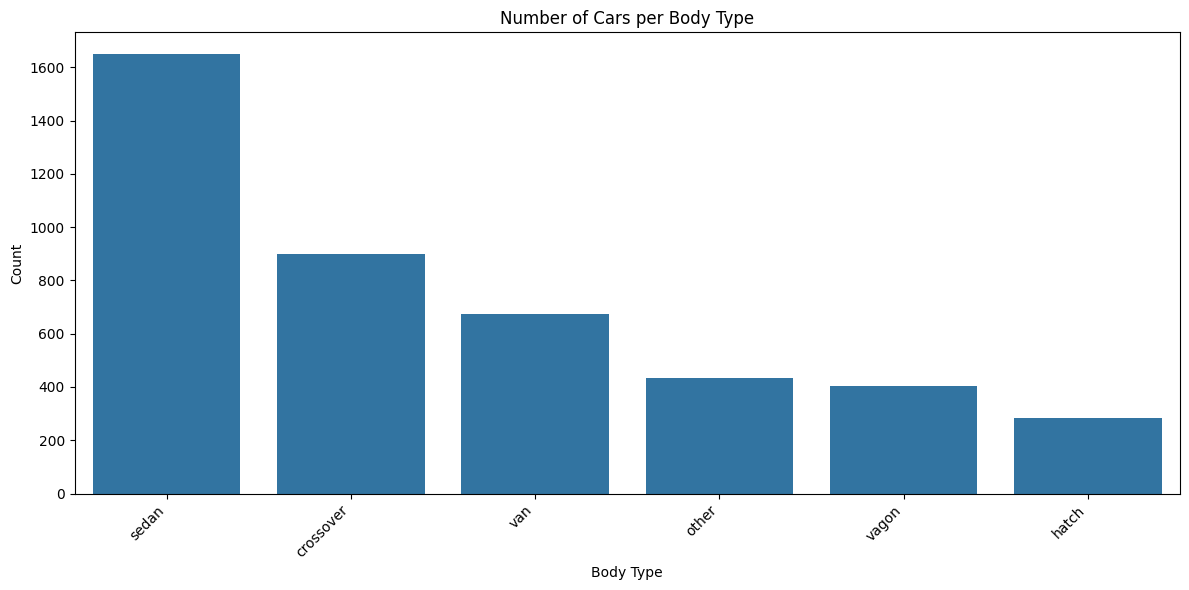

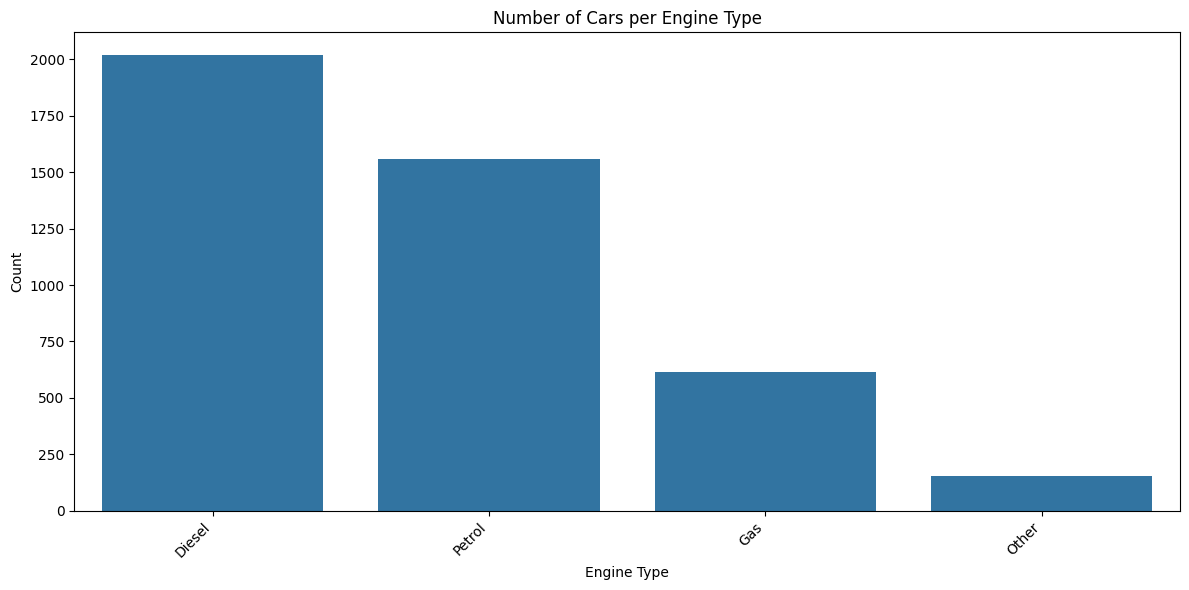

In [13]:
# prompt: make variuous bar chart with df

# Assuming 'df' is your DataFrame
# Create a bar plot for the 'Brand' column
plt.figure(figsize=(12,6))
brand_counts = df['Brand'].value_counts()
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.title('Number of Cars per Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Body' column
plt.figure(figsize=(12,6))
body_counts = df['Body'].value_counts()
sns.barplot(x=body_counts.index, y=body_counts.values)
plt.title('Number of Cars per Body Type')
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Create a bar plot for the 'Engine Type' column
plt.figure(figsize=(12,6))
engine_type_counts = df['Engine Type'].value_counts()
sns.barplot(x=engine_type_counts.index, y=engine_type_counts.values)
plt.title('Number of Cars per Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


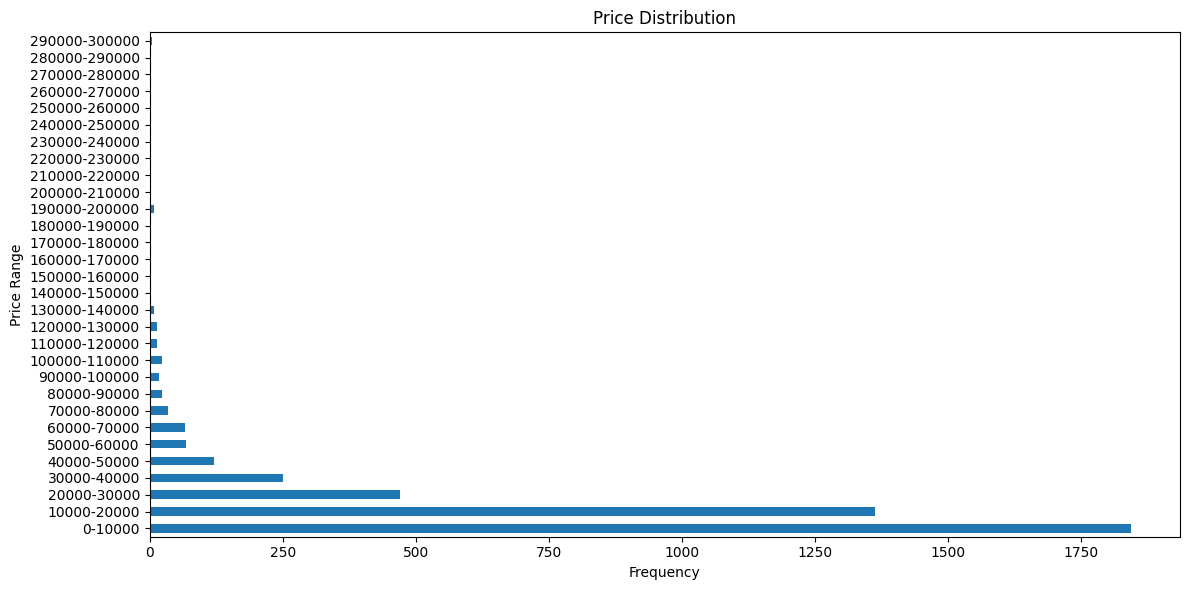

In [ ]:
# Define bin edges for price (adjust as needed)
bins = range(0, int(df['Price'].max()) + 10000, 10000)

# Create labels for the bins (adjust as needed)
labels = [f'{i}-{i + 10000}' for i in bins[:-1]]

# Group the price data into bins
df['Price_Group'] = pd.cut(df['Price'], bins=bins, labels=labels, include_lowest=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
df['Price_Group'].value_counts(sort=False).plot(kind='barh')  # Horizontal bar plot
plt.xlabel('Frequency')
plt.ylabel('Price Range')
plt.title('Price Distribution')
plt.tight_layout()
plt.show()


### Plot Cars vs Year

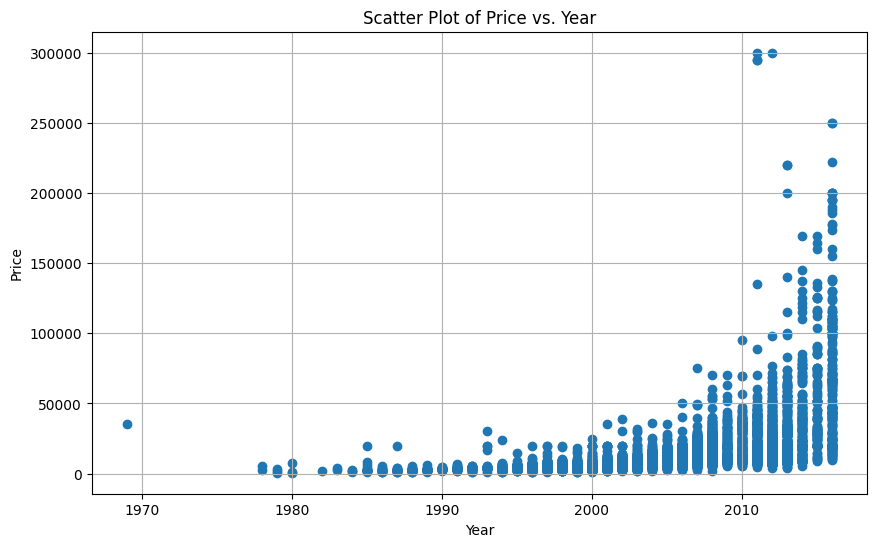

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Year')
plt.grid(True)
plt.show()


In [ ]:
df.head(0)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price_Group


### Price, Milage, Year Visualisation

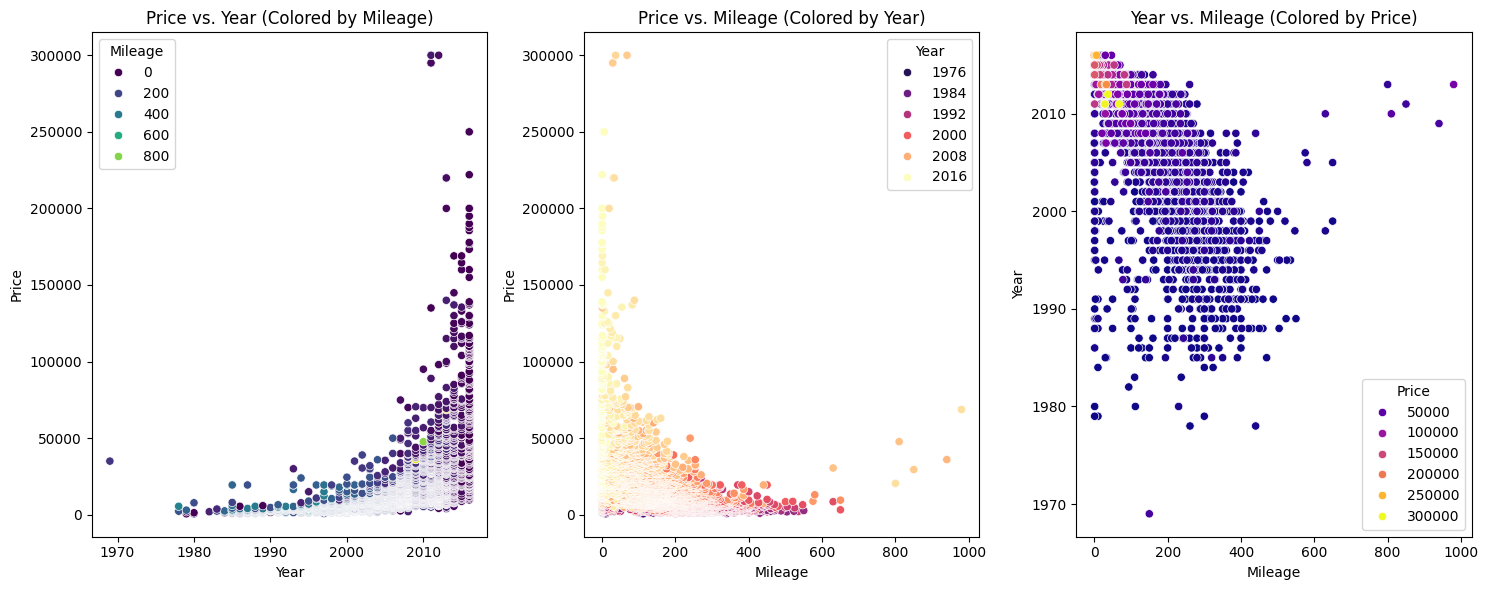

In [ ]:

# Sort the DataFrame by Price, Year, and Mileage in ascending order
df_sorted = df.sort_values(by=['Price', 'Year', 'Mileage'])

# Create a combined plot for better visualization
plt.figure(figsize=(15, 6))

# Plot 1: Price vs. Year
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Price', data=df_sorted, hue='Mileage', palette='viridis')
plt.title('Price vs. Year (Colored by Mileage)')


# Plot 2: Price vs. Mileage
plt.subplot(1, 3, 2)
sns.scatterplot(x='Mileage', y='Price', data=df_sorted, hue='Year', palette='magma')
plt.title('Price vs. Mileage (Colored by Year)')

# Plot 3: Year vs Mileage
plt.subplot(1,3,3)
sns.scatterplot(x='Mileage', y='Year', data=df_sorted, hue='Price', palette='plasma')
plt.title('Year vs. Mileage (Colored by Price)')


plt.tight_layout()
plt.show()

#If you want to show just the sorted data frame
#print(df_sorted)


### Checking To see most expensive car and what contributed to it

In [ ]:
# Group data by brand and calculate the sum of prices for each brand
brand_sales = df.groupby('Brand')['Price'].sum()

# Find the brand with the highest total sales
most_sold_brand = brand_sales.idxmax()

print(f"The most sold car brand is: {most_sold_brand}")

# Analyze factors contributing to the high sales of the most sold brand
most_sold_cars = df[df['Brand'] == most_sold_brand]

# Analyze the distribution of body types for the most sold brand
body_type_counts = most_sold_cars['Body'].value_counts()
print(f"\nBody type distribution for {most_sold_brand}:")
print(body_type_counts)


# Analyze the distribution of engine types for the most sold brand
engine_type_counts = most_sold_cars['Engine Type'].value_counts()
print(f"\nEngine type distribution for {most_sold_brand}:")
print(engine_type_counts)

# Find the top 5 cars with highest prices
top_5_price = df.nlargest(5, 'Price')

print("\nTop 5 Cars with the Highest Prices:")
print(top_5_price[['Brand', 'Body', 'Engine Type', 'Price']])


# Analyze factors contributing to the high prices of other top brands
for index, row in top_5_price.iterrows():
    brand = row['Brand']
    body_type = row['Body']
    engine_type = row['Engine Type']
    price = row['Price']

    print(f"\nAnalysis for {brand}:")
    print(f"Body Type: {body_type}, Engine Type: {engine_type}, Price: {price}")

    # You can further analyze the sales of cars with the same body and engine types
    # to see if they also contributed to high sales
    specific_cars = df[(df['Brand'] == brand) & (df['Body'] == body_type) & (df['Engine Type'] == engine_type)]

    if not specific_cars.empty:
        sales_count = len(specific_cars)
        print(f"Number of cars sold with this configuration: {sales_count}")

    else:
        print(f"No other cars found with the same configuration.")


The most sold car brand is: Mercedes-Benz

Body type distribution for Mercedes-Benz:
Body
sedan        385
van          182
crossover    168
other        141
hatch         23
vagon         22
Name: count, dtype: int64

Engine type distribution for Mercedes-Benz:
Engine Type
Diesel    509
Petrol    282
Gas        98
Other      32
Name: count, dtype: int64

Top 5 Cars with the Highest Prices:
              Brand   Body Engine Type     Price
1728  Mercedes-Benz  sedan      Petrol  300000.0
4318  Mercedes-Benz  other      Petrol  300000.0
3164  Mercedes-Benz  sedan      Petrol  295000.0
4101  Mercedes-Benz  sedan      Petrol  295000.0
2243  Mercedes-Benz  other      Petrol  250000.0

Analysis for Mercedes-Benz:
Body Type: sedan, Engine Type: Petrol, Price: 300000.0
Number of cars sold with this configuration: 152

Analysis for Mercedes-Benz:
Body Type: other, Engine Type: Petrol, Price: 300000.0
Number of cars sold with this configuration: 63

Analysis for Mercedes-Benz:
Body Type: sedan, 

Inference:

Mercedes-Benz is the most sold car brand.
Sedans with petrol engines are popular, contributing to high sales and prices.
Diesel engines are the most common overall for Mercedes-Benz.
'Other' body types with petrol engines also have a notable presence, especially among high-priced cars.
Mercedes-Benz caters to diverse preferences with various body types, engine types, and price points.

### Lest Bought Car

In [ ]:
# Group data by brand and calculate the sum of prices for each brand
brand_sales = df.groupby('Brand')['Price'].sum()

# Find the brand with the lowest total sales
least_sold_brand = brand_sales.idxmin()

print(f"The least sold car brand is: {least_sold_brand}")

# Analyze factors contributing to the low sales of the least sold brand
least_sold_cars = df[df['Brand'] == least_sold_brand]

# Analyze the distribution of body types for the least sold brand
body_type_counts = least_sold_cars['Body'].value_counts()
print(f"\nBody type distribution for {least_sold_brand}:")
print(body_type_counts)

# Analyze the distribution of engine types for the least sold brand
engine_type_counts = least_sold_cars['Engine Type'].value_counts()
print(f"\nEngine type distribution for {least_sold_brand}:")
print(engine_type_counts)

# You can further analyze other factors like price range, mileage, etc.,
# to understand the reasons for low sales of the least sold brand.

The least sold car brand is: Mitsubishi

Body type distribution for Mitsubishi:
Body
crossover    137
sedan        129
other         26
hatch         19
vagon          8
van            8
Name: count, dtype: int64

Engine type distribution for Mitsubishi:
Engine Type
Petrol    150
Gas       114
Diesel     51
Other      12
Name: count, dtype: int64


Inference:

Mitsubishi is the least sold car brand, possibly due to lower demand for crossovers and sedans compared to other brands. While Petrol and Gas engine types are common, they might not align with current market preferences in this brand's lineup, potentially affecting overall sales. Further investigation into factors like price and mileage could shed more light on its lower sales compared to other car brands.

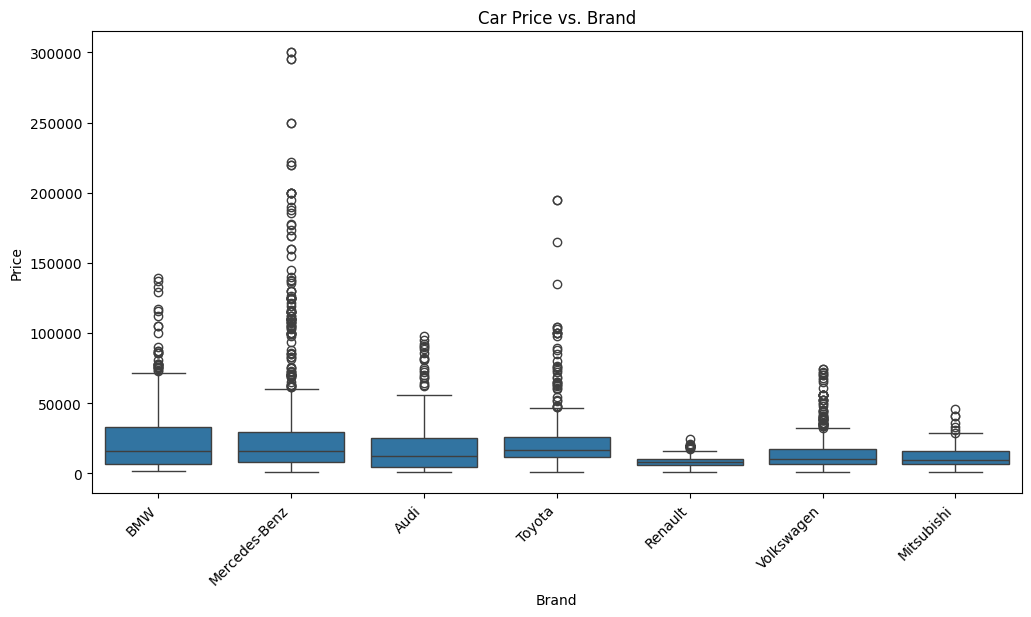

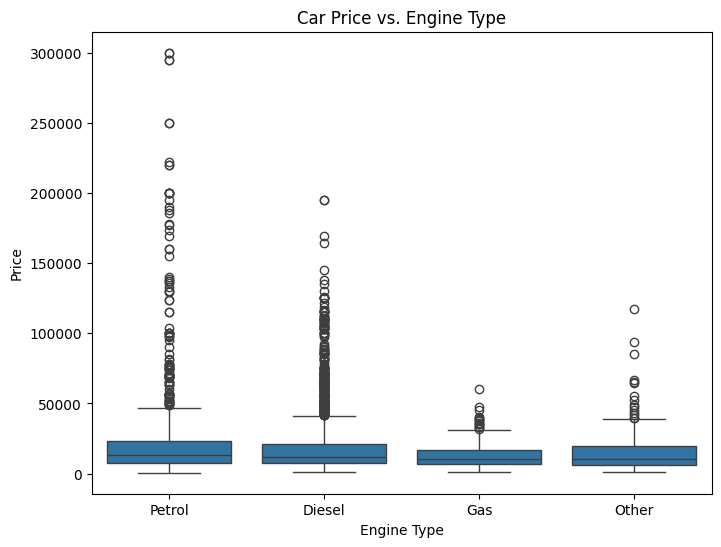

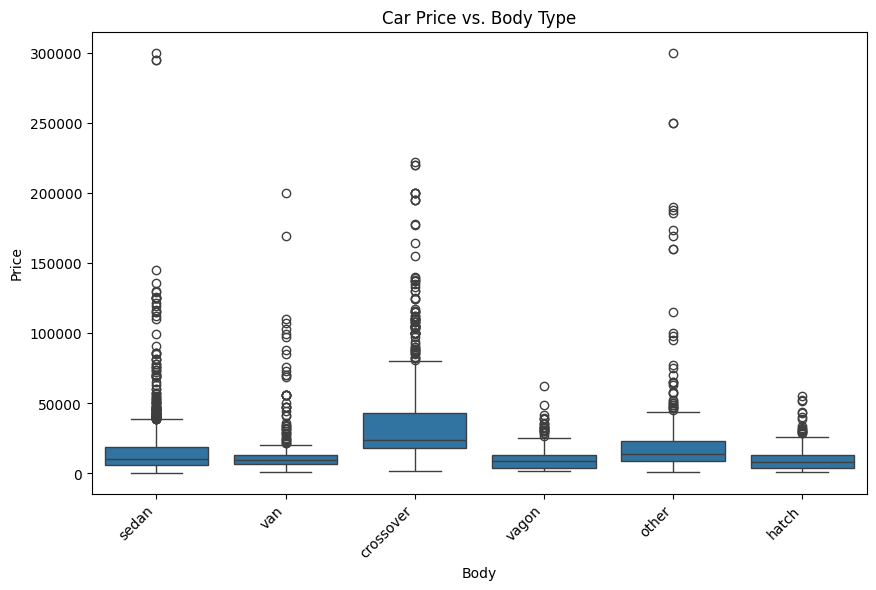

In [ ]:
# prompt: plot car price relation with brand, ebgine type, brand

# Plot the relationship between car price and brand
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Car Price vs. Brand')
plt.show()

# Plot the relationship between car price and engine type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Engine Type', y='Price', data=df)
plt.title('Car Price vs. Engine Type')
plt.show()


# Plot the relationship between car price and body type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Body', y='Price', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Car Price vs. Body Type')
plt.show()


### Chhecking Registration Price relationship

In [ ]:
# prompt: Check wether tthe most registered cars have the highest value

# Find the top 5 most registered car brands
top_5_brands = df['Brand'].value_counts().nlargest(5).index

# Get the average price for each of the top 5 brands
average_prices = df[df['Brand'].isin(top_5_brands)].groupby('Brand')['Price'].mean()

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Brand': top_5_brands, 'Average_Price': average_prices})

# Sort the DataFrame by average price in descending order
result_df = result_df.sort_values(by='Average_Price', ascending=False)


# Display the sorted results
print(result_df)

#Check if the order of brands is the same
registration_order = df['Brand'].value_counts().nlargest(5).index
price_order = result_df['Brand'].values

print(f"\nRegistration order: {registration_order}")
print(f"Price order: {price_order}")

if np.array_equal(registration_order, price_order):
    print("\nThe most registered car brands have the highest average prices.")
else:
    print("\nThe most registered car brands do not necessarily have the highest average prices.")


                       Brand  Average_Price
Brand                                      
Mercedes-Benz  Mercedes-Benz   29769.761714
BMW               Volkswagen   23377.435048
Toyota                Toyota   22485.666645
Volkswagen           Renault   13313.534395
Renault                  BMW    8350.664457

Registration order: Index(['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'Renault'], dtype='object', name='Brand')
Price order: ['Mercedes-Benz' 'Volkswagen' 'Toyota' 'Renault' 'BMW']

The most registered car brands do not necessarily have the highest average prices.


# Feature Engineering

In [14]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Define the categorical columns to encode
categorical_cols = ['Brand', 'Body', 'Engine Type', "Model"]

# Iterate through the categorical columns and encode them
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display the updated DataFrame
df.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,1,4200.0,3,277,2.0,3,yes,1991,18
1,2,7900.0,5,427,2.9,0,yes,1999,266
2,2,13300.0,3,358,5.0,1,yes,2003,237
3,0,23000.0,0,240,4.2,3,yes,2007,224
4,5,18300.0,0,120,2.0,3,yes,2011,227


## Binary Encoding of Categorical Feature

In [15]:
df['Registration'] = df['Registration'].map({'yes': 1, 'no': 0})


In [16]:
print(df["Registration"])

0       1
1       1
2       1
3       1
4       1
       ..
4340    1
4341    1
4342    1
4343    1
4344    1
Name: Registration, Length: 4345, dtype: int64


### Percentage of Reegistered to Unregistered Cars

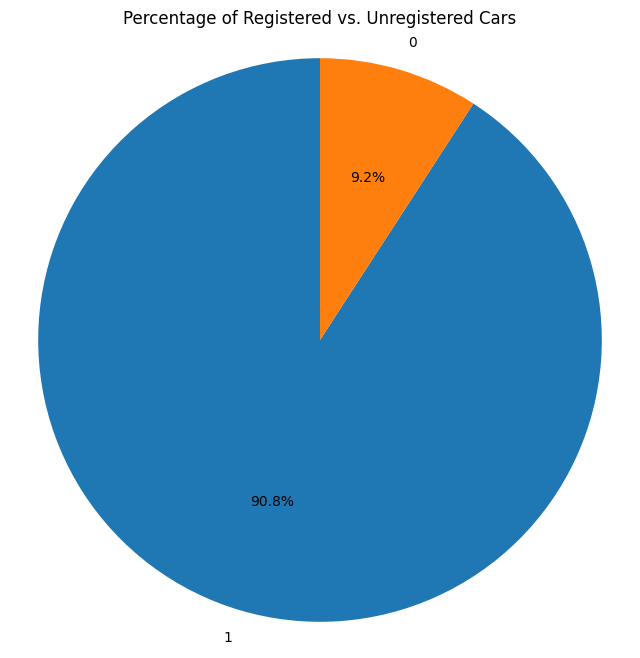

In [17]:
# prompt: Pie chart of registered to unregistered cars

# Calculate the percentage of registered and unregistered cars
registered_percentage = df['Registration'].value_counts(normalize=True) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(registered_percentage, labels=registered_percentage.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Registered vs. Unregistered Cars')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Normlisation
Checking to see if data is normal distributed


### **Hypothesis Test**

**Null Hypothesis (H0)**: The price data is normally distributed.

**Alternative Hypothesis (H1)**: The price data is not normally distributed.
Test Statistic: D'Agostino's K^2 statistic (calculated using stats.normaltest)

Significance Level (alpha): 0.05 (as defined in the code)

**Decision Rule:**
If the p-value is less than alpha (0.05), reject the null hypothesis (H0). This means there is sufficient evidence to conclude that the price data is not normally distributed.
If the p-value is greater than or equal to alpha (0.05), fail to reject the null hypothesis (H0). This means there is not enough evidence to conclude that the price data is not normally distributed.

In [18]:
from scipy import stats


def normalisaion(check):

  # Calculate D'Agostino's K^2 test for normality
  k2, p_value = stats.normaltest(check)

  # Print the results
  print(f"D'Agostino's K^2 statistic: {k2}")
  print(f"P-value: {p_value}")

  # Interpret the results
  alpha = 0.05  # Significance level
  if p_value < alpha:
      print("The price data is not normally distributed (reject H0)")
  else:
      print("The price data is normally distributed (fail to reject H0)")


Checking for normality of data using D'Agostino's K^2 test.
The null hypothesis (H0) of normality was rejected
because the p-value was less than the significance level (alpha) of 0.05.

### Log Transform

In [19]:
# Assuming 'df' is your DataFrame and 'Price' column needs log transformation
log_price = np.log1p(df['Price'])

normalisaion(log_price)


D'Agostino's K^2 statistic: 34.45725736430557
P-value: 3.293833426777208e-08
The price data is not normally distributed (reject H0)


### Square Transfrom

In [20]:
square_price = df['Price'] ** 2

normalisaion(square_price)


D'Agostino's K^2 statistic: 7460.670040989789
P-value: 0.0
The price data is not normally distributed (reject H0)


### Boxcox

In [21]:
# Apply Box-Cox transformation
from scipy.stats import boxcox

boxcox_price, lambda_val = boxcox(df['Price'])

normalisaion(boxcox_price)

print(f"Optimal lambda value for Box-Cox transformation: {lambda_val}")


D'Agostino's K^2 statistic: 4.714587370175984
P-value: 0.09467610013995456
The price data is normally distributed (fail to reject H0)
Optimal lambda value for Box-Cox transformation: -0.06324516570399195


## Splitting Dataset

In [28]:
X = df.drop(['Price', "Price_Group"], axis=1)
y = boxcox_price

In [29]:
print(X.shape)
print(y.shape)

(4345, 8)
(4345,)


## Using Polynomial Feature on X train and test split

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False) # Example degree 2
X = poly.fit_transform(X)
X.shape


(4345, 44)

In [32]:
print(X.shape)
print(y.shape)

(4345, 44)
(4345,)


Splitting into Train set and Test Set

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3476, 44)
(869, 44)
(3476,)
(869,)


### Standardiation

In [36]:
# prompt: stardise x_train aand x_test

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler_train = StandardScaler()
scaler_test = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler_train.fit_transform(X_train)
X_test = scaler_test.fit_transform(X_test)


# Simple Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.0613246576044879
R-squared: 0.746211809075825


In [40]:
from scipy.special import inv_boxcox

# Inverse Box-Cox transform for y_pred and y_test
y_pred_original = inv_boxcox(y_pred, lambda_val)
y_test_original = inv_boxcox(y_test, lambda_val)

Mean Squared Error (Original Scale): 29971794481.507946
R-squared (Original Scale): -67.50765582986817


In [42]:
# Create a 2D array with y_pred_original and y_test_original side by side
combined_array = np.column_stack((y_pred_original, y_test_original))

combined_array


array([[35753.40793749, 34900.        ],
       [13557.9589565 , 14900.        ],
       [35490.08914609, 33700.        ],
       ...,
       [31043.06135787, 51000.        ],
       [26556.5337184 , 41500.        ],
       [27685.22566599, 28500.        ]])

# POLYNOMIAL REGRESSION

In [51]:
# prompt: Train X-train and y_train using xgboost regression linear regression

#Import xgboost
!pip install xgboost
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

#Inverse Box-Cox transform for y_pred_xgb
y_pred_xgb_original = inv_boxcox(y_pred_xgb, lambda_val)

# Combine with other predictions for comparison if needed
combined_array_xgb = np.column_stack((y_pred_xgb_original, y_test_original))
combined_array_xgb


XGBoost Mean Squared Error: 0.07528609610053637
XGBoost R-squared: 0.688433284791786


array([[49416.97659358, 34900.        ],
       [23803.57840365, 14900.        ],
       [28963.21965688, 33700.        ],
       ...,
       [51941.46321703, 51000.        ],
       [38226.15531888, 41500.        ],
       [27953.35363327, 28500.        ]])